In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm
from scipy.stats import t
from scipy.stats import ttest_ind

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

pd.set_option('display.float_format', lambda x: '%.2f' % x)
%matplotlib inline

In [2]:
df = pd.read_csv('insurance.csv')

In [3]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.90,0,yes,southwest,16884.92
1,18,male,33.77,1,no,southeast,1725.55
2,28,male,33.00,3,no,southeast,4449.46
3,33,male,22.70,0,no,northwest,21984.47
4,32,male,28.88,0,no,northwest,3866.86


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [5]:
df.describe()

,age,bmi,children,charges
count,1338.00,1338.00,1338.00,1338.00
mean,39.21,30.66,1.09,13270.42
std,14.05,6.10,1.21,12110.01
min,18.00,15.96,0.00,1121.87
25%,27.00,26.30,0.00,4740.29
50%,39.00,30.40,1.00,9382.03
75%,51.00,34.69,2.00,16639.91
max,64.00,53.13,5.00,63770.43


## Descriptive Statistics

### 1. Age Average

Average age of the data: 39.21


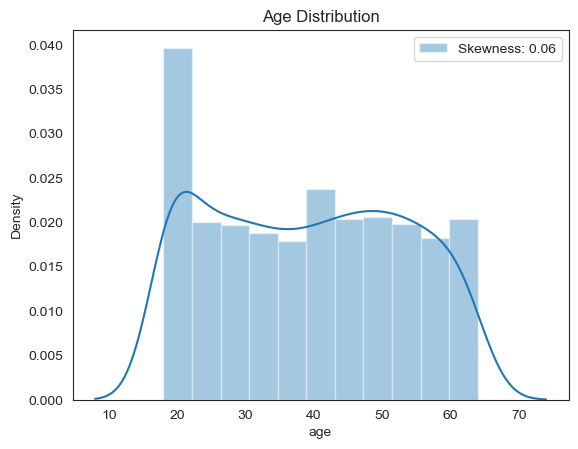

In [96]:
print ("Average age of the data: {:.2f}" .format(df['age'].mean()))

#DISTRIBUTION OF TOTAL BMI
sns.set_style('white')
sns.distplot(df['age'], label = 'Skewness: %.2f'%(df['age'].skew()))
plt.legend(loc = 'best')
plt.title('Age Distribution')
plt.show()

### 2. BMI Average and Smoker

In [8]:
np.mean(df[df['smoker'] == "yes"].bmi)

30.708448905109503

BMI average: 30.66
BMI average of smoker: 30.71


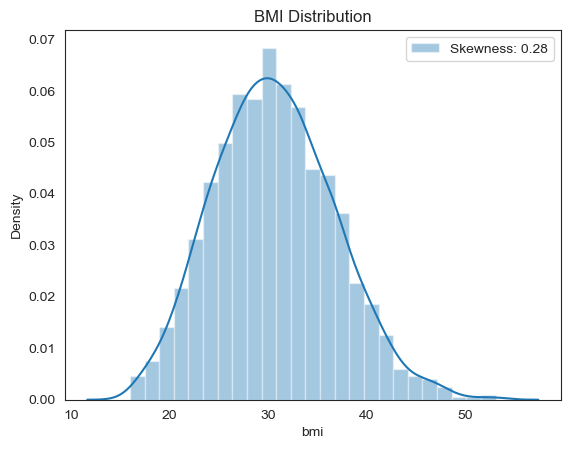

In [65]:
print ("BMI average: {:.2f}" .format(df['bmi'].mean()))
print ("BMI average of smoker: {:.2f}" .format(df.loc[df['smoker'] == 'yes']['bmi'].mean()))

#DISTRIBUTION OF TOTAL BMI
sns.set_style('white')
sns.distplot(df['bmi'], label = 'Skewness: %.2f'%(df['bmi'].skew()))
plt.legend(loc = 'best')
plt.title('BMI Distribution')
plt.show()

### 3. Variance for Smoker and Non-Smoker

Variance Charges Smoker = 132721153.14
Variance Charges Non Smoker = 35891656.00 


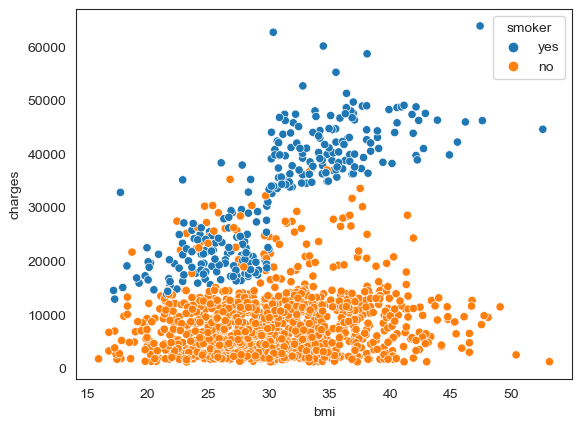

In [31]:
var_charges_S = np.var(df[df['smoker'] == "yes"].charges)
var_charges_NS = np.var(df[df['smoker'] == "no"].charges)
print(f'Variance Charges Smoker = {var_charges_S:.2f}')
print(f'Variance Charges Non Smoker = {var_charges_NS:.2f} ')

sns.scatterplot(x=df['bmi'], y=df['charges'], hue=df['smoker'])
plt.show()

### 4. Average Age for Male and Female Smoker

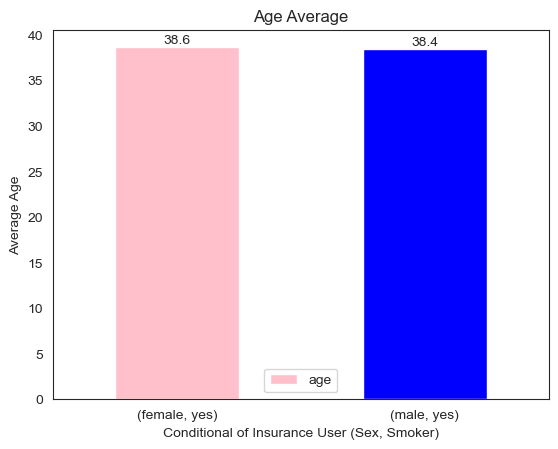

In [109]:
smoker_male = df.loc[(df['smoker'] == 'yes')&(df['sex'] =='male')]
smoker_female = df.loc[(df['smoker'] == 'yes')&(df['sex'] =='female')]
#print ("Age average of male smoker: {:.2f}" .format(smoker_male['age'].mean()))
#print ("Age average of female smoker: {:.2f}" .format(smoker_female['age'].mean()))
df_age_avg_smoker = (df[df['smoker'].isin(['yes'])].groupby(['sex','smoker']).agg(np.mean))
ax = df_age_avg_smoker.plot(kind="bar", y="age", title="Age Average", color=['pink', 'blue'])
rects = ax.patches

def add_value_labels(ax, spacing=0.5):
    """Add labels to the end of each bar in a bar chart.

    Arguments:
        ax (matplotlib.axes.Axes): The matplotlib object containing the axes
            of the plot to annotate.
        spacing (int): The distance between the labels and the bars.
    """

    # For each bar: Place a label
    for rect in ax.patches:
        # Get X and Y placement of label from rect.
        y_value = rect.get_height()
        x_value = rect.get_x() + rect.get_width() / 2

        # Number of points between bar and label. Change to your liking.
        space = spacing
        # Vertical alignment for positive values
        va = 'bottom'

        # If value of bar is negative: Place label below bar
        if y_value < 0:
            # Invert space to place label below
            space *= -1
            # Vertically align label at top
            va = 'top'

        # Use Y value as label and format number with one decimal place
        label = "{:.1f}".format(y_value)

        # Create annotation
        ax.annotate(
            label,                      # Use `label` as label
            (x_value, y_value),         # Place label at end of the bar
            xytext=(0, space),          # Vertically shift label by `space`
            textcoords="offset points", # Interpret `xytext` as offset in points
            ha='center',                # Horizontally center label
            va=va)                      # Vertically align label differently for
                                        # positive and negative values.


# Call the function above. All the magic happens there.
add_value_labels(ax)

# Rotate the x-labels by 30 degrees, and keep the text aligned horizontally
plt.xticks(rotation=0, horizontalalignment="center")
plt.xlabel("Conditional of Insurance User (Sex, Smoker)")
plt.ylabel("Average Age")
plt.show()

### 5. Insurance Charges for Smoker and Non-Smoker

Average smokers health charges: 32050.23
Average non-smokers health charges: 8434.27


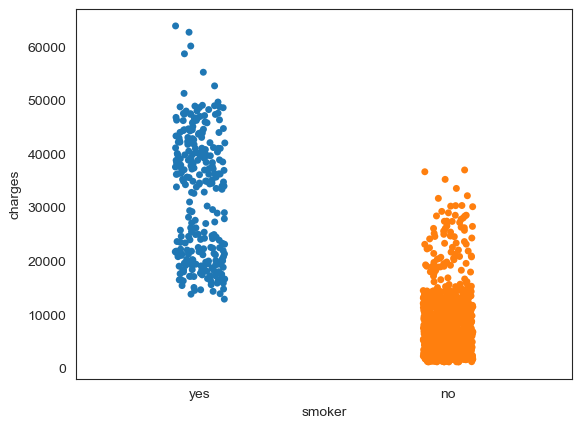

In [98]:
sns.stripplot(x=df['smoker'],y=df['charges'])

print ('Average smokers health charges: {:.2f}'.format(df.loc[df['smoker'] == 'yes']['charges'].mean()))
print ('Average non-smokers health charges: {:.2f}'.format(df.loc[df['smoker'] == 'no']['charges'].mean()))
df_charges_avg_smoker = (df[df['smoker'].isin(['yes', 'no'])].groupby(['smoker']).agg(np.mean))
plt.show()

In [119]:
df_charges_avg_smoker

,age,bmi,children,charges,smoker2
smoker,,,,,
no,39.39,30.65,1.09,8434.27,0.00
yes,38.51,30.71,1.11,32050.23,1.00


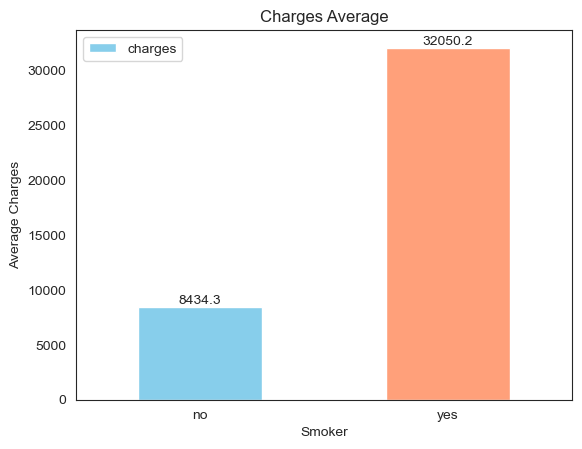

In [106]:
ax = df_charges_avg_smoker.plot(kind="bar", y="charges", title="Charges Average", color=['skyblue', 'lightsalmon'])
rects = ax.patches

def add_value_labels(ax, spacing=0.3):
    """Add labels to the end of each bar in a bar chart.

    Arguments:
        ax (matplotlib.axes.Axes): The matplotlib object containing the axes
            of the plot to annotate.
        spacing (int): The distance between the labels and the bars.
    """

    # For each bar: Place a label
    for rect in ax.patches:
        # Get X and Y placement of label from rect.
        y_value = rect.get_height()
        x_value = rect.get_x() + rect.get_width() / 2

        # Number of points between bar and label. Change to your liking.
        space = spacing
        # Vertical alignment for positive values
        va = 'bottom'

        # If value of bar is negative: Place label below bar
        if y_value < 0:
            # Invert space to place label below
            space *= -1
            # Vertically align label at top
            va = 'top'

        # Use Y value as label and format number with one decimal place
        label = "{:.1f}".format(y_value)

        # Create annotation
        ax.annotate(
            label,                      # Use `label` as label
            (x_value, y_value),         # Place label at end of the bar
            xytext=(0, space),          # Vertically shift label by `space`
            textcoords="offset points", # Interpret `xytext` as offset in points
            ha='center',                # Horizontally center label
            va=va)                      # Vertically align label differently for
                                        # positive and negative values.


# Call the function above. All the magic happens there.
add_value_labels(ax)

# Rotate the x-labels by 30 degrees, and keep the text aligned horizontally
plt.xticks(rotation=0, horizontalalignment="center")
plt.xlabel("Smoker")
plt.ylabel("Average Charges")
plt.show()

###  6. Average Insurance Charges for Smoker and Non-Smoker When BMI > 25

Average smokers health charges (BMI > 25) : 35116.91
Average non-smokers health charges (BMI > 25) : 8629.59


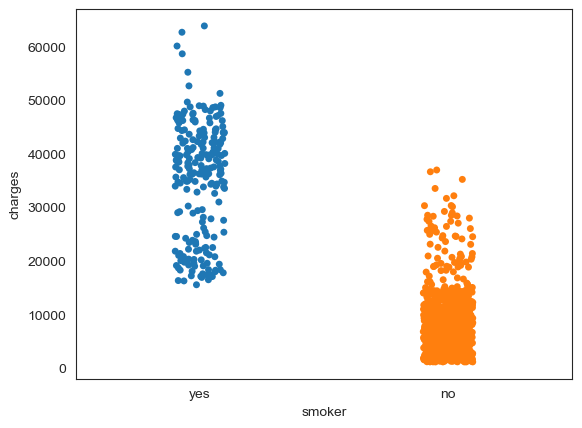

In [111]:
bmi_upper_25 = df.loc[df['bmi']>25]
sns.stripplot(x='smoker',y='charges', data=bmi_upper_25)

smoker_bmi = df.loc[(df['smoker'] == 'yes')&(df['bmi'] >25)]
non_smoker_bmi = df.loc[(df['smoker'] == 'no')&(df['bmi'] >25)]

print ('Average smokers health charges (BMI > 25) : {:.2f}'.format(smoker_bmi['charges'].mean()))
print ('Average non-smokers health charges (BMI > 25) : {:.2f}'.format(non_smoker_bmi['charges'].mean()))

In [116]:
bmi_upper_25

,age,sex,bmi,children,smoker,region,charges,age_category,smoker2
0,19,female,27.90,0,yes,southwest,16884.92,18-35,1
1,18,male,33.77,1,no,southeast,1725.55,18-35,0
2,28,male,33.00,3,no,southeast,4449.46,18-35,0
4,32,male,28.88,0,no,northwest,3866.86,18-35,0
5,31,female,25.74,0,no,southeast,3756.62,18-35,0
...,...,...,...,...,...,...,...,...,...
1333,50,male,30.97,3,no,northwest,10600.55,36-55,0
1334,18,female,31.92,0,no,northeast,2205.98,18-35,0
1335,18,female,36.85,0,no,southeast,1629.83,18-35,0
1336,21,female,25.80,0,no,southwest,2007.94,18-35,0


In [120]:
df_charges_bmi = (bmi_upper_25[bmi_upper_25['smoker'].isin(['yes', 'no'])].groupby(['smoker']).agg(np.mean))
df_charges_bmi

,age,bmi,children,charges,smoker2
smoker,,,,,
no,40.07,32.51,1.09,8629.59,0.00
yes,38.82,32.83,1.08,35116.91,1.00


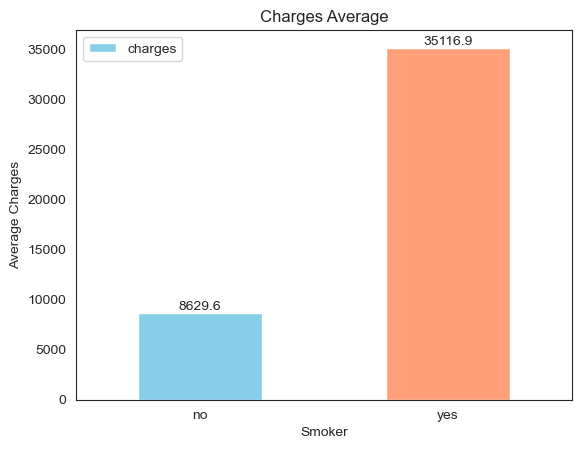

In [121]:
ax = df_charges_bmi.plot(kind="bar", y="charges", title="Charges Average", color=['skyblue', 'lightsalmon'])
rects = ax.patches

def add_value_labels(ax, spacing=0.3):
    """Add labels to the end of each bar in a bar chart.

    Arguments:
        ax (matplotlib.axes.Axes): The matplotlib object containing the axes
            of the plot to annotate.
        spacing (int): The distance between the labels and the bars.
    """

    # For each bar: Place a label
    for rect in ax.patches:
        # Get X and Y placement of label from rect.
        y_value = rect.get_height()
        x_value = rect.get_x() + rect.get_width() / 2

        # Number of points between bar and label. Change to your liking.
        space = spacing
        # Vertical alignment for positive values
        va = 'bottom'

        # If value of bar is negative: Place label below bar
        if y_value < 0:
            # Invert space to place label below
            space *= -1
            # Vertically align label at top
            va = 'top'

        # Use Y value as label and format number with one decimal place
        label = "{:.1f}".format(y_value)

        # Create annotation
        ax.annotate(
            label,                      # Use `label` as label
            (x_value, y_value),         # Place label at end of the bar
            xytext=(0, space),          # Vertically shift label by `space`
            textcoords="offset points", # Interpret `xytext` as offset in points
            ha='center',                # Horizontally center label
            va=va)                      # Vertically align label differently for
                                        # positive and negative values.


# Call the function above. All the magic happens there.
add_value_labels(ax)

# Rotate the x-labels by 30 degrees, and keep the text aligned horizontally
plt.xticks(rotation=0, horizontalalignment="center")
plt.xlabel("Smoker")
plt.ylabel("Average Charges")
plt.show()

## Analisa Variabel Kategorik (PMF)

### 1. Which gender has the highest billing?

In [28]:
df_age_avg_smoker = (df[df['smoker'].isin(['yes'])].groupby(['sex','smoker']).agg(np.mean))
df_age_avg_smoker

,,age,bmi,children,charges
sex,smoker,,,,
female,yes,38.61,29.61,1.01,30679.00
male,yes,38.45,31.50,1.19,33042.01


BMI average of Female: 30.38
BMI average of Male: 30.94
         age   bmi  children  charges  smoker2
sex                                           
female 39.50 30.38      1.07 12569.58     0.17
male   38.92 30.94      1.12 13956.75     0.24


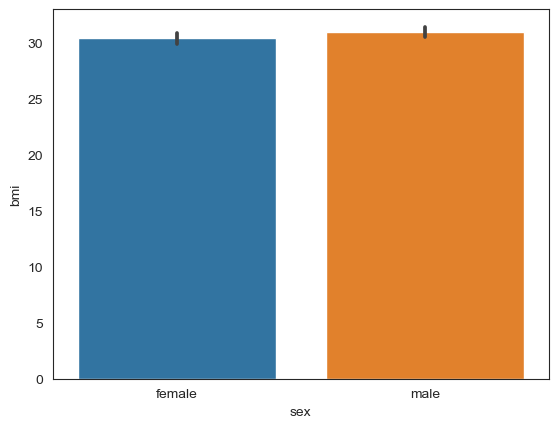

In [122]:
print("BMI average of Female: {:.2f}".format(df.loc[df['sex']=='female']['bmi'].mean()))
print("BMI average of Male: {:.2f}".format(df.loc[df['sex']=='male']['bmi'].mean()))

sns.barplot(x='sex',y='bmi', data=df)
df_bmi_avg = (df[df['sex'].isin(['female', 'male'])].groupby(['sex']).agg(np.mean))
print (df_bmi_avg)


In [125]:
df_bmi_avg

,age,bmi,children,charges,smoker2
sex,,,,,
female,39.50,30.38,1.07,12569.58,0.17
male,38.92,30.94,1.12,13956.75,0.24


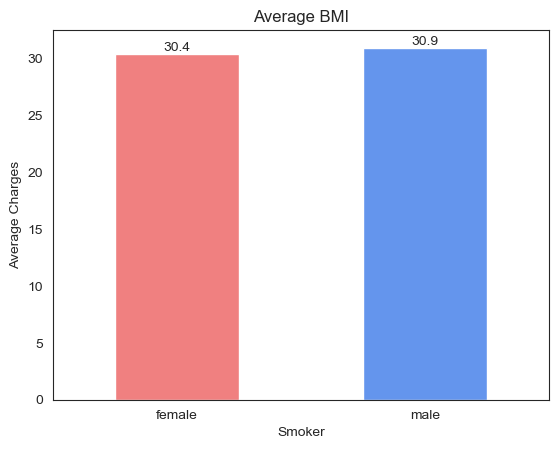

In [130]:
ax = df_bmi_avg.plot(kind = "bar", y = "bmi", legend = False, color=['lightcoral','cornflowerblue'],title = "Average BMI")
rects = ax.patches

def add_value_labels(ax, spacing=0.3):
    """Add labels to the end of each bar in a bar chart.

    Arguments:
        ax (matplotlib.axes.Axes): The matplotlib object containing the axes
            of the plot to annotate.
        spacing (int): The distance between the labels and the bars.
    """

    # For each bar: Place a label
    for rect in ax.patches:
        # Get X and Y placement of label from rect.
        y_value = rect.get_height()
        x_value = rect.get_x() + rect.get_width() / 2

        # Number of points between bar and label. Change to your liking.
        space = spacing
        # Vertical alignment for positive values
        va = 'bottom'

        # If value of bar is negative: Place label below bar
        if y_value < 0:
            # Invert space to place label below
            space *= -1
            # Vertically align label at top
            va = 'top'

        # Use Y value as label and format number with one decimal place
        label = "{:.1f}".format(y_value)

        # Create annotation
        ax.annotate(
            label,                      # Use `label` as label
            (x_value, y_value),         # Place label at end of the bar
            xytext=(0, space),          # Vertically shift label by `space`
            textcoords="offset points", # Interpret `xytext` as offset in points
            ha='center',                # Horizontally center label
            va=va)                      # Vertically align label differently for
                                        # positive and negative values.


# Call the function above. All the magic happens there.
add_value_labels(ax)

# Rotate the x-labels by 30 degrees, and keep the text aligned horizontally
plt.xticks(rotation=0, horizontalalignment="center")
plt.xlabel("Smoker")
plt.ylabel("Average Charges")
plt.show()

In [127]:
df_sex = pd.DataFrame(df.groupby(['sex']).max().charges)
df_sex

,charges
sex,
female,63770.43
male,62592.87


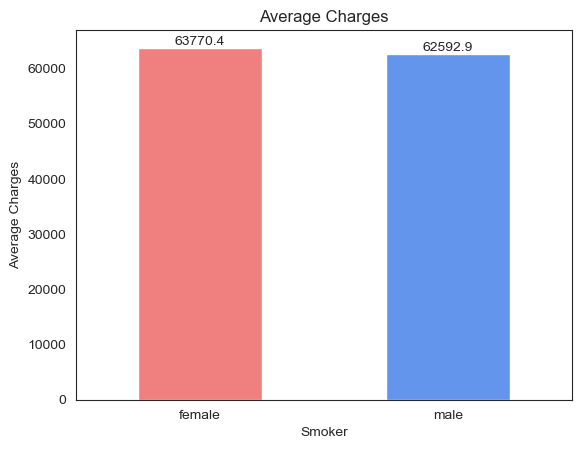

In [129]:
ax = df_sex.plot(kind = "bar", y = "charges", legend = False, color=['lightcoral','cornflowerblue'],title = "Average Charges")
rects = ax.patches

def add_value_labels(ax, spacing=0.3):
    """Add labels to the end of each bar in a bar chart.

    Arguments:
        ax (matplotlib.axes.Axes): The matplotlib object containing the axes
            of the plot to annotate.
        spacing (int): The distance between the labels and the bars.
    """

    # For each bar: Place a label
    for rect in ax.patches:
        # Get X and Y placement of label from rect.
        y_value = rect.get_height()
        x_value = rect.get_x() + rect.get_width() / 2

        # Number of points between bar and label. Change to your liking.
        space = spacing
        # Vertical alignment for positive values
        va = 'bottom'

        # If value of bar is negative: Place label below bar
        if y_value < 0:
            # Invert space to place label below
            space *= -1
            # Vertically align label at top
            va = 'top'

        # Use Y value as label and format number with one decimal place
        label = "{:.1f}".format(y_value)

        # Create annotation
        ax.annotate(
            label,                      # Use `label` as label
            (x_value, y_value),         # Place label at end of the bar
            xytext=(0, space),          # Vertically shift label by `space`
            textcoords="offset points", # Interpret `xytext` as offset in points
            ha='center',                # Horizontally center label
            va=va)                      # Vertically align label differently for
                                        # positive and negative values.


# Call the function above. All the magic happens there.
add_value_labels(ax)

# Rotate the x-labels by 30 degrees, and keep the text aligned horizontally
plt.xticks(rotation=0, horizontalalignment="center")
plt.xlabel("Smoker")
plt.ylabel("Average Charges")
plt.show()

age                    54
sex                female
bmi                 47.41
children                0
smoker                yes
region          southeast
charges          63770.43
smoker2                 1
age_category        36-55
Name: 543, dtype: object


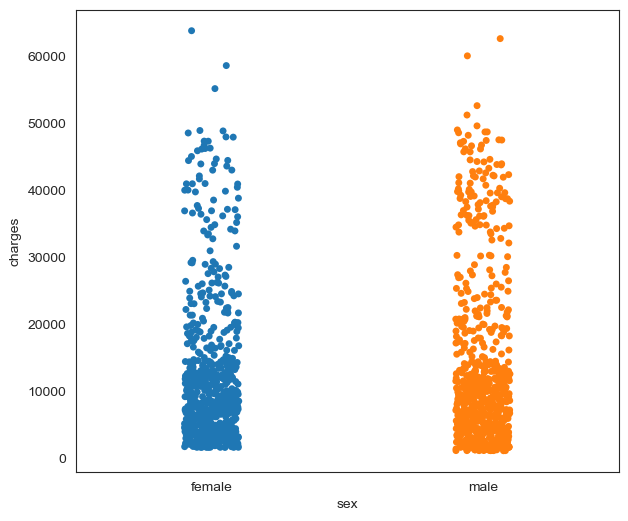

In [66]:
sns.set_style('white')
plt.figure(figsize = (7, 6))
sns.stripplot(x='sex',y='charges', data=df)
print (df.loc[df['charges'].idxmax()])

BMI average of Smoker: 30.71
BMI average of Non-Smoker: 30.65


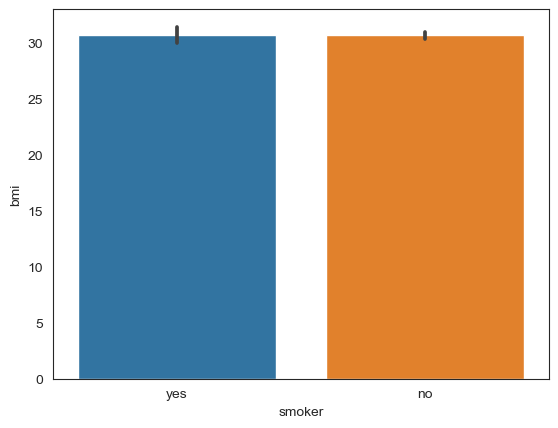

In [33]:


print("BMI average of Smoker: {:.2f}".format(df.loc[df['smoker']=='yes']['bmi'].mean()))
print("BMI average of Non-Smoker: {:.2f}".format(df.loc[df['smoker']=='no']['bmi'].mean()))

sns.barplot(x='smoker',y='bmi', data=df)
plt.show()


### 2. Distribution of billing odds in each region

In [13]:
sum_charges = np.sum(df.charges)
pd.DataFrame(df.groupby(['region']).sum().charges.apply(lambda x: x/sum_charges))

,charges
region,
northeast,0.24
northwest,0.23
southeast,0.30
southwest,0.23


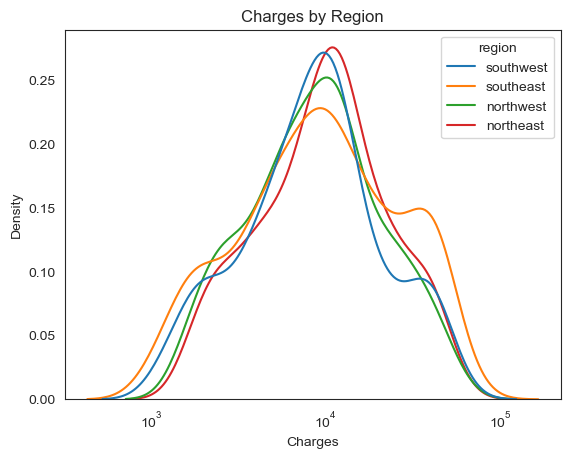

In [34]:
sns.kdeplot(data=df, x="charges", hue='region', log_scale=True)
plt.xlabel('Charges')
plt.title('Charges by Region')
plt.show()

### 3. Does each region have the same proportion of people data?

In [14]:
pd.DataFrame(df.groupby(['region']).count().age).rename(columns={'age':'people'})

,people
region,
northeast,324
northwest,325
southeast,364
southwest,325


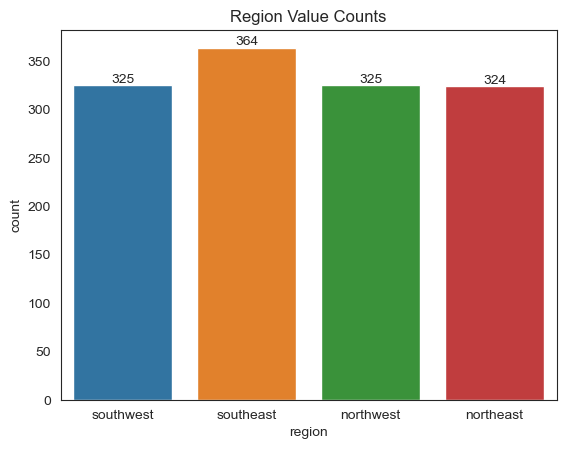

In [70]:
# Countplot with percentage

total = len(df)
plt.title('Region Value Counts')
ax = sns.countplot(x = 'region', data = df)

for p in ax.patches:
    x=p.get_bbox().get_points()[:,0]
    y=p.get_bbox().get_points()[1,1]
    ax.annotate('{:.0f}'.format(p.get_height()), (x.mean(), y), 
            ha='center', va='bottom') # set the alignment of the text
plt.show()

### 4. Does each region have the same proportion of people data?

In [131]:
data_smoker = pd.DataFrame(df.groupby(['smoker']).count().age).rename(columns={'age':'people'})
data_smoker

,people
smoker,
no,1064
yes,274


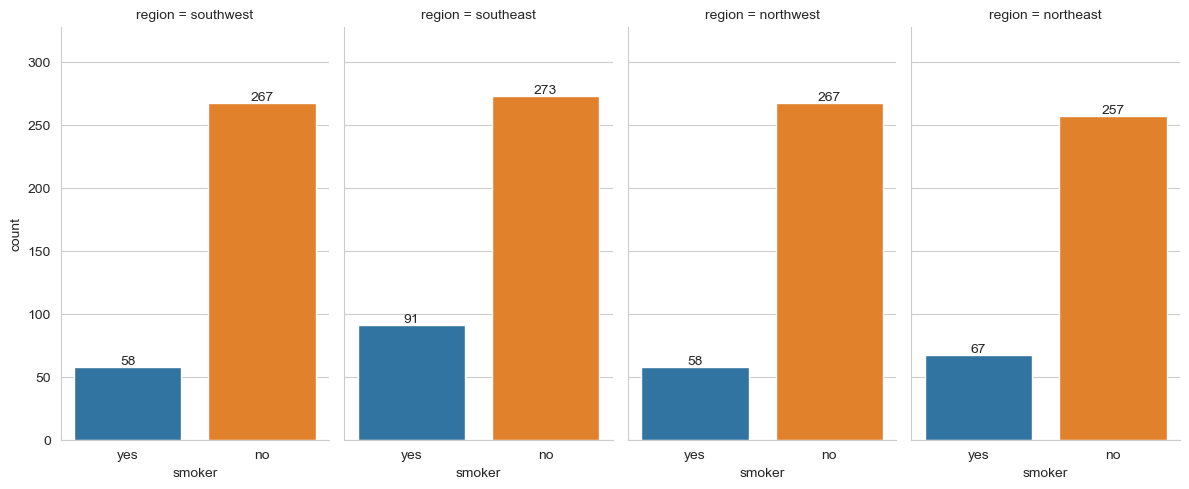

In [71]:
sns.set_style('whitegrid')
graph = sns.catplot(x = 'smoker', col = 'region', data = df, kind = 'count', aspect = 0.6)

# iterate through axes
for ax in graph.axes.ravel():
    
    # add annotations
    for c in ax.containers:
        labels = [f'{(v.get_height()):.0f}' for v in c]
        ax.bar_label(c, labels=labels, label_type='edge')
    ax.margins(y=0.2)

plt.show()

### 5. What is the probability that a person is known to be a woman who smokes?

In [138]:
count_smokers = df.groupby(['smoker']).count().age[1]
female_smokers = df.loc[(df.smoker == 'yes')].groupby(['sex']).count().age[0]

print(f'The probability that a woman is known to smoke = {female_smokers/count_smokers:.3f}')

The probability that a woman is known to smoke = 0.420


sex     smoker
female  no       0.51
        yes      0.42
male    no       0.49
        yes      0.58
dtype: float64


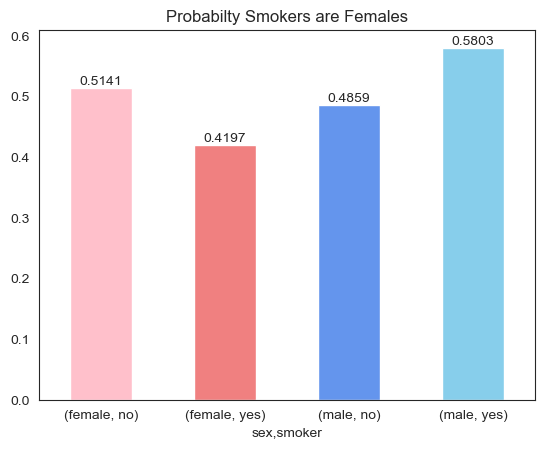

In [142]:
#SIMPLE CALCULATION FROM DATASET
smoker_prob = df.groupby('smoker').size().div(len(df))
gender_prob = df.groupby(['sex', 'smoker']).size().div(len(df)).div(smoker_prob, axis=0, level='smoker')
print (gender_prob)

ax = gender_prob.plot(kind = "bar", y = "smoker", legend = False, color=
['pink', 'lightcoral','cornflowerblue','skyblue'], title = "Probabilty Smokers are Females")

for p in ax.patches:
    x=p.get_bbox().get_points()[:,0]
    y=p.get_bbox().get_points()[1,1]
    ax.annotate('{:.4f}'.format(p.get_height()), (x.mean(), y), 
            ha='center', va='bottom') # set the alignment of the text
plt.xticks(rotation=0, horizontalalignment="center")
plt.show()

### 6. What is the probability that a person who is a male is known to be a smoker?

In [17]:
count_smokers = df.groupby(['smoker']).count().age[1]
male_smokers = df.loc[(df.smoker == 'yes')].groupby(['sex']).count().age[1]

print(f'The probability that a man is known to smoke = {male_smokers/count_smokers:.3f}')

The probability that a man is known to smoke = 0.580


In [74]:
#MANUAL CONDITIONAL PROBABILITY CALCULATIONS
female_smoker = df.loc[(df['smoker'] == 'yes')&(df['sex'] =='female')]
male_smoker = df.loc[(df['smoker'] == 'yes')&(df['sex'] =='male')]
smoker = df.loc[df['smoker']=='yes']

print ('P (Female | Smoker): {:.4f}'.format(len(female_smoker)/len(smoker)))
print ('P (Male | Smoker): {:.4f}'.format(len(male_smoker)/len(smoker)))

P (Female | Smoker): 0.4197
P (Male | Smoker): 0.5803


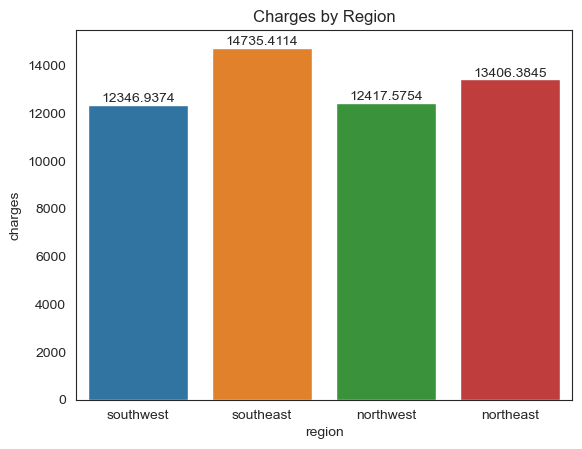

In [156]:
ax = sns.barplot(x = 'region', y = 'charges', data = df,  ci=None)
for p in ax.patches:
    x=p.get_bbox().get_points()[:,0]
    y=p.get_bbox().get_points()[1,1]
    ax.annotate('{:.4f}'.format(p.get_height()), (x.mean(), y), 
            ha='center', va='bottom') # set the alignment of the text
plt.xticks(rotation=0, horizontalalignment="center")
plt.title('Charges by Region')
plt.show()

## Continous Variable Analysis

In [38]:
def cari_cdf(x,col='charges', type='besar'):
    BMI25 = df[condition]
    series = BMI25[col]
    mean = np.mean(series)
    var = np.var(series)
    std = np.sqrt(var)
    X = (x-mean)/std
    
    if type == 'besar':
        ans = 1-norm.cdf(X,0,1)
    else:
        ans = norm.cdf(X,0,1)
    return print(f'Peluang = {ans}'), sns.distplot(BMI25[col]), plt.axvline(x, color="r", linestyle="--")

### 1. Looking at the odds, a smoker with a BMI above 25 will get a health bill above 16,700

Peluang = 0.9577125487589742


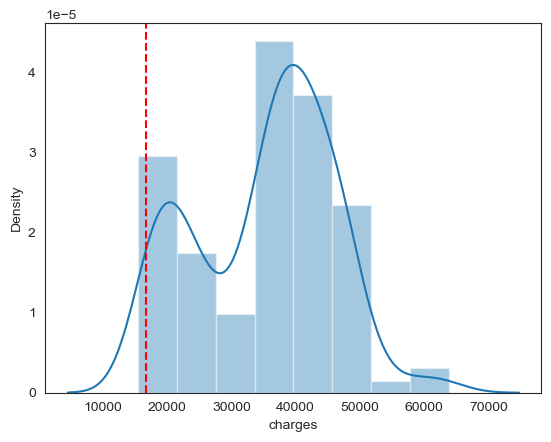

In [39]:
condition = (df.bmi > 25) & (df.smoker == 'yes')
cari_cdf(16700)
plt.show()

### 2. What is the probability that a random person whose health bill is above 16.7k is found to be a smoker?

Peluang = 0.9086407687093684


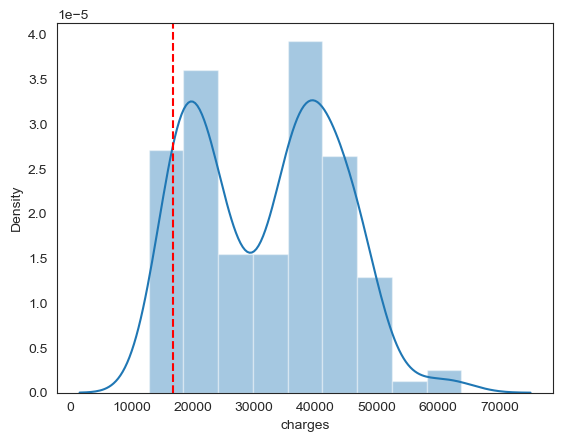

In [40]:
condition = (df.smoker == 'yes')
cari_cdf(16700)
plt.show()

In [41]:
#MANUAL CALCULATION OF CHARGES AND BMI
bmi = df.loc[df['bmi']>25]
charges_bmi = df.loc[(df['bmi']>25) & (df['charges']>16700)]

print ('P (Charges > 16.700 | BMI > 25): {:.4f}'.format(len(charges_bmi)/len(bmi)))

P (Charges > 16.700 | BMI > 25): 0.2594


### 3. Probability Comparison

#### a. Someone with a BMI over 25 gets a health bill above 16.7k

Peluang = 0.4150257865243673


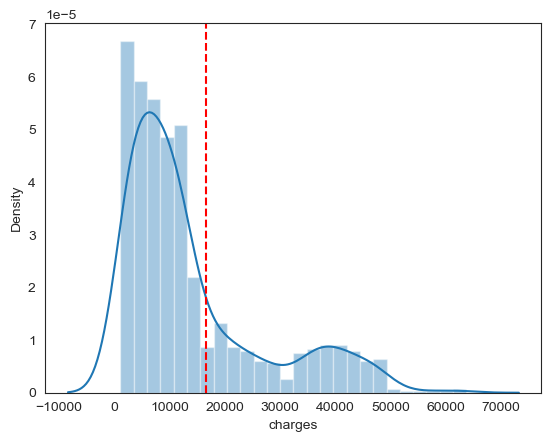

In [42]:
condition = (df.bmi > 25)
cari_cdf(16700)
plt.show()

In [157]:
bmi_up_25 = df.loc[df['bmi']>25]
charges_bmi_up_25 = df.loc[(df['bmi']>25) & (df['charges']>16700)]

print ('P (Charges > 16.700 | BMI > 25): {:.4f}'.format(len(charges_bmi_up_25)/len(bmi_up_25)))

P (Charges > 16.700 | BMI > 25): 0.2594


#### b. Someone with a BMI under 25 gets a health bill above 16.7k

Peluang = 0.1962425286399061


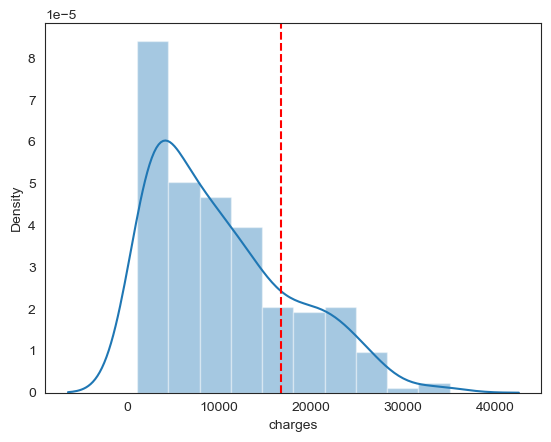

In [43]:
condition = (df.bmi < 25)
cari_cdf(16700)
plt.show()

In [80]:
#MANUAL CALCULATION OF CHARGES AND BMI
bmi_under_25 = df.loc[df['bmi']<25]
charges_bmi_under_25 = df.loc[(df['bmi']<25) & (df['charges']>16700)]

print ('P (Charges > 16.700 | BMI < 25): {:.4f}'.format(len(charges_bmi_under_25)/len(bmi_under_25)))

P (Charges > 16.700 | BMI < 25): 0.2082


### 4. Probability Comparison

#### a. A smoker with a BMI over 25 gets a health bill above 16.7k

Peluang = 0.9577125487589742


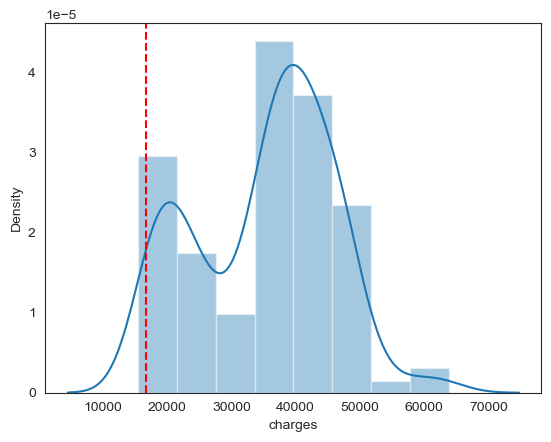

In [44]:
condition = (df.smoker == 'yes') & (df.bmi > 25)
cari_cdf(16700)
plt.show()

#### b. A non-smoker with a BMI over 25 gets a health bill above 16.7k

Peluang = 0.09064317172700154


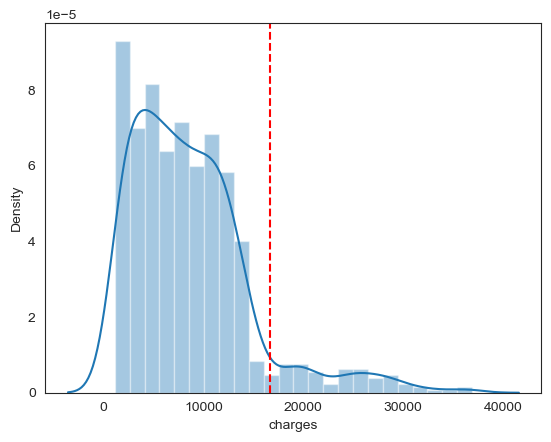

In [45]:
condition = (df.smoker == 'no') & (df.bmi > 25)
cari_cdf(16700)
plt.show()

## Correlation Variables Analysis

In [48]:
df['smoker2'] = df.smoker.map({'yes':1, 'no':0})

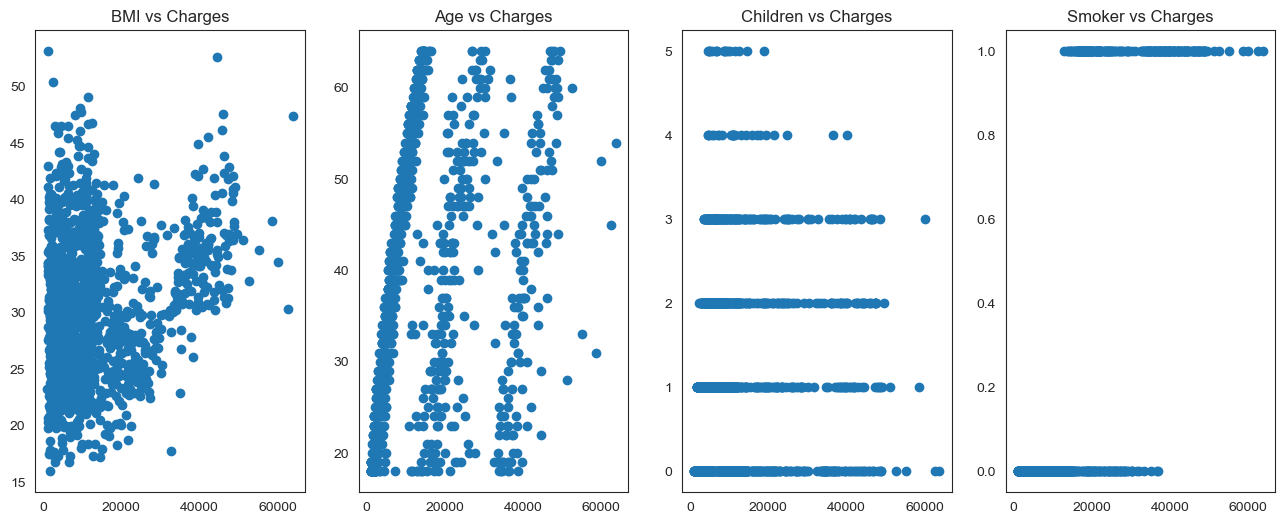

In [49]:
plt.figure(figsize=(16,6))
plt.subplot(1,4,1)
plt.scatter(df.charges, df.bmi )
plt.title("BMI vs Charges")

plt.subplot(1,4,2)
plt.scatter(df.charges, df.age)
plt.title("Age vs Charges")

plt.subplot(1,4,3)
plt.scatter(df.charges, df.children)
plt.title("Children vs Charges")

plt.subplot(1,4,4)
plt.scatter(df.charges, df.smoker2)
plt.title("Smoker vs Charges")
plt.show()

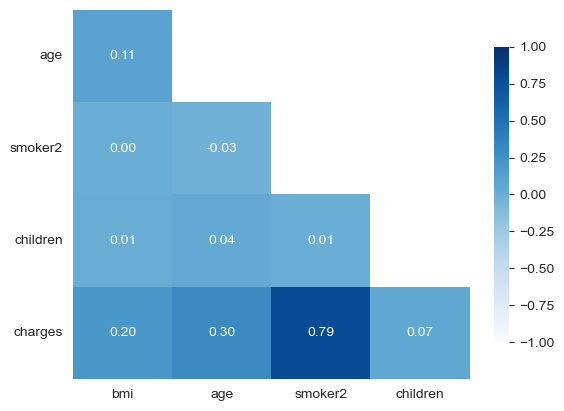

In [62]:
# import file with data
data = df[['bmi', 'age', 'smoker2','children', 'charges']].corr()
# mask
mask = np.triu(np.ones_like(data.corr()))
# adjust mask and df
mask = mask[1:, :-1]
corr = data.iloc[1:,:-1].copy()
# plot heatmap
sns.heatmap(corr, mask=mask, annot=True, fmt=".2f", cmap='Blues',vmin=-1, vmax=1, cbar_kws={"shrink": .8})
# yticks
plt.yticks(rotation=0)
plt.show()

## Hypotesis Test

### 1. Smokers' health bills are higher than non-smokers' health bills

Hipotesis
H0: Smoker charges = Non smoker charges
H1: Smoker charges < Non smoker charges

In [30]:
alpha = 0.05

In [31]:
#setup data untuk masing-masing kategori
cond1 = (df.smoker == "yes")
cond2 = (df.smoker == "no")

tagihan_perokok = df[cond1].charges
tagihan_non_perokok = df[cond2].charges
tagihan_non_perokok_sample = tagihan_non_perokok.sample(n=274, random_state=17)

In [32]:
#check sampling
print(tagihan_non_perokok.mean())
print(tagihan_non_perokok_sample.mean())

8434.268297856199
8263.435098759126


In [33]:
#check variance
np.var(tagihan_perokok), np.var(tagihan_non_perokok_sample)

(132721153.13625304, 33328888.188136943)

In [34]:
#critical value
t_crit = t.ppf(alpha,df=273)
print(t_crit)

-1.650454303021593


In [35]:
#statistical test
stat, p = ttest_ind(tagihan_perokok, tagihan_non_perokok_sample, equal_var=False, alternative='less')

print('p-value = %.8f' % (p))

p-value = 1.00000000


In [36]:
#Results based on P-value
if p > alpha:
    print('H0 accepted') 
else:
    print('H0 rejected')

H0 diterima


### 2. Health bills with a BMI above 25 are higher than health bills with a BMI below 25

Hipotesis:
H0: High BMI charges = Low BMI charges
H1: High BMI charges < Low BMI charges

In [37]:
cond1 = (df.bmi > 25)
cond2 = (df.bmi <= 25)

bmi_besar = df[cond1].charges
bmi_kecil = df[cond2].charges

len(bmi_besar), len(bmi_kecil)

(1091, 247)

In [38]:
#sampling & checking
bmi_besar_sample = bmi_besar.sample(n=247, random_state=1)

bmi_besar.mean(), bmi_besar_sample.mean()

(13946.47603532447, 14218.25426417004)

In [39]:
#check variance
np.var(bmi_kecil), np.var(bmi_besar_sample)

(55940041.24428085, 167496860.75306293)

In [40]:
#critical value
t_crit = t.ppf(alpha,df=246)
print(t_crit)

-1.6510713448508139


In [41]:
#statistical test
stat, p = ttest_ind(bmi_besar_sample, bmi_kecil, equal_var=False, alternative='less')

print('p-value = %.8f' % (p))

p-value = 0.99997764


In [42]:
#Results based on P-value
if p > alpha:
    print('H0 accepted') 
else:
    print('H0 rejected')

H0 diterima


### 3. The BMI of men and women is the same

Hipotesis:
H0: Male BMI = Female BMI
H1: Male BMI ≠ Female BMI 

In [43]:
cond1 = (df.sex == 'male')
cond2 = (df.sex == 'female')

bmi_male = df[cond1].bmi
bmi_female = df[cond2].bmi

In [44]:
len(bmi_male), len(bmi_female)

(676, 662)

In [45]:
#sampling dan checking
bmi_male_sample = bmi_male.sample(n=662, random_state=17)

bmi_male.mean(), bmi_male_sample.mean()

(30.943128698224832, 30.964879154078528)

In [46]:
#check variance
np.var(bmi_male_sample), np.var(bmi_female)

(37.914850211982355, 36.49917703379856)

In [47]:
#critical value
t_crit = t.ppf(alpha,df=661)
print(t_crit)

-1.6471621291696426


In [48]:
#statistical test
stat, p = ttest_ind(bmi_male_sample, bmi_female, equal_var=False, alternative='two-sided')

print('p-value = %.8f' % (p))

p-value = 0.08037162


In [49]:
#Results based on P-value
if p > alpha:
    print('H0 accepted') 
else:
    print('H0 rejected')

H0 diterima
